In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd
from scipy.io import wavfile
from scipy.signal import firls, firwin
from google.colab import drive
import cmath
import copy

# Лабораторная работа 3.2
Фильтрация из заданий 2.5 и 2.6,но с использованием линейных фильтров

In [ ]:
# 2.7
Fs7, data7 = wavfile.read('/tune.wav')

In [ ]:
N7 = 2011
M7 = int((N7 - 1) / 2)
L7 = 3 * M7

In [ ]:
# фильтр для удаления шумов на частотах выше 1200 Гц
des7 = list([0 if fk >= 1200 else 1 for fk in np.linspace(0, int(Fs7/2), int(Fs7/2))])
h_7 = firls(N7, np.linspace(0, int(Fs7/2), int(Fs7/2)), des7, fs=Fs7)

In [ ]:
res_sig_7 = np.convolve(data7, h_7, mode="same")

In [ ]:
wavfile.write('/tune_filt.wav', Fs7, np.int16(res_sig_7))

In [ ]:
# вариант решения с оконным фильтром
h_7_win = firwin(N7, 1200.0, pass_zero='lowpass', fs=Fs7)

In [ ]:
res_sig_7_win = np.convolve(data7, h_7_win, mode="same")

In [ ]:
wavfile.write('/tune_filt_win.wav', Fs7, np.int16(res_sig_7_win))

In [ ]:
# 2.8
ecg = pd.read_csv('/ecg.dat', sep=" ", names=["time", "value"])

In [ ]:
T8 = ecg.iloc[1].time - ecg.iloc[0].time

In [ ]:
discr_fourier_pts_8 = np.fft.fft(ecg.value)

In [ ]:
N8 = len(ecg.value)
Fs8 = 1 / T8

In [ ]:
N = 1711
M = int((N - 1) / 2)
L = 3 * M

In [ ]:
# нужен фильтр, пропускающий всё, что ниже 50 Гц
des8 = list([1 if fk <= 50 else 0 for fk in np.linspace(0, int(Fs8/2), int(Fs8/2))])
h_8 = firls(N, np.linspace(0, int(Fs8/2), int(Fs8/2)), des8, fs=Fs8)

In [ ]:
res_sig_8 = np.convolve(ecg.value, h_8, mode="same")

Text(0.5, 1.0, 'Filtered signal')

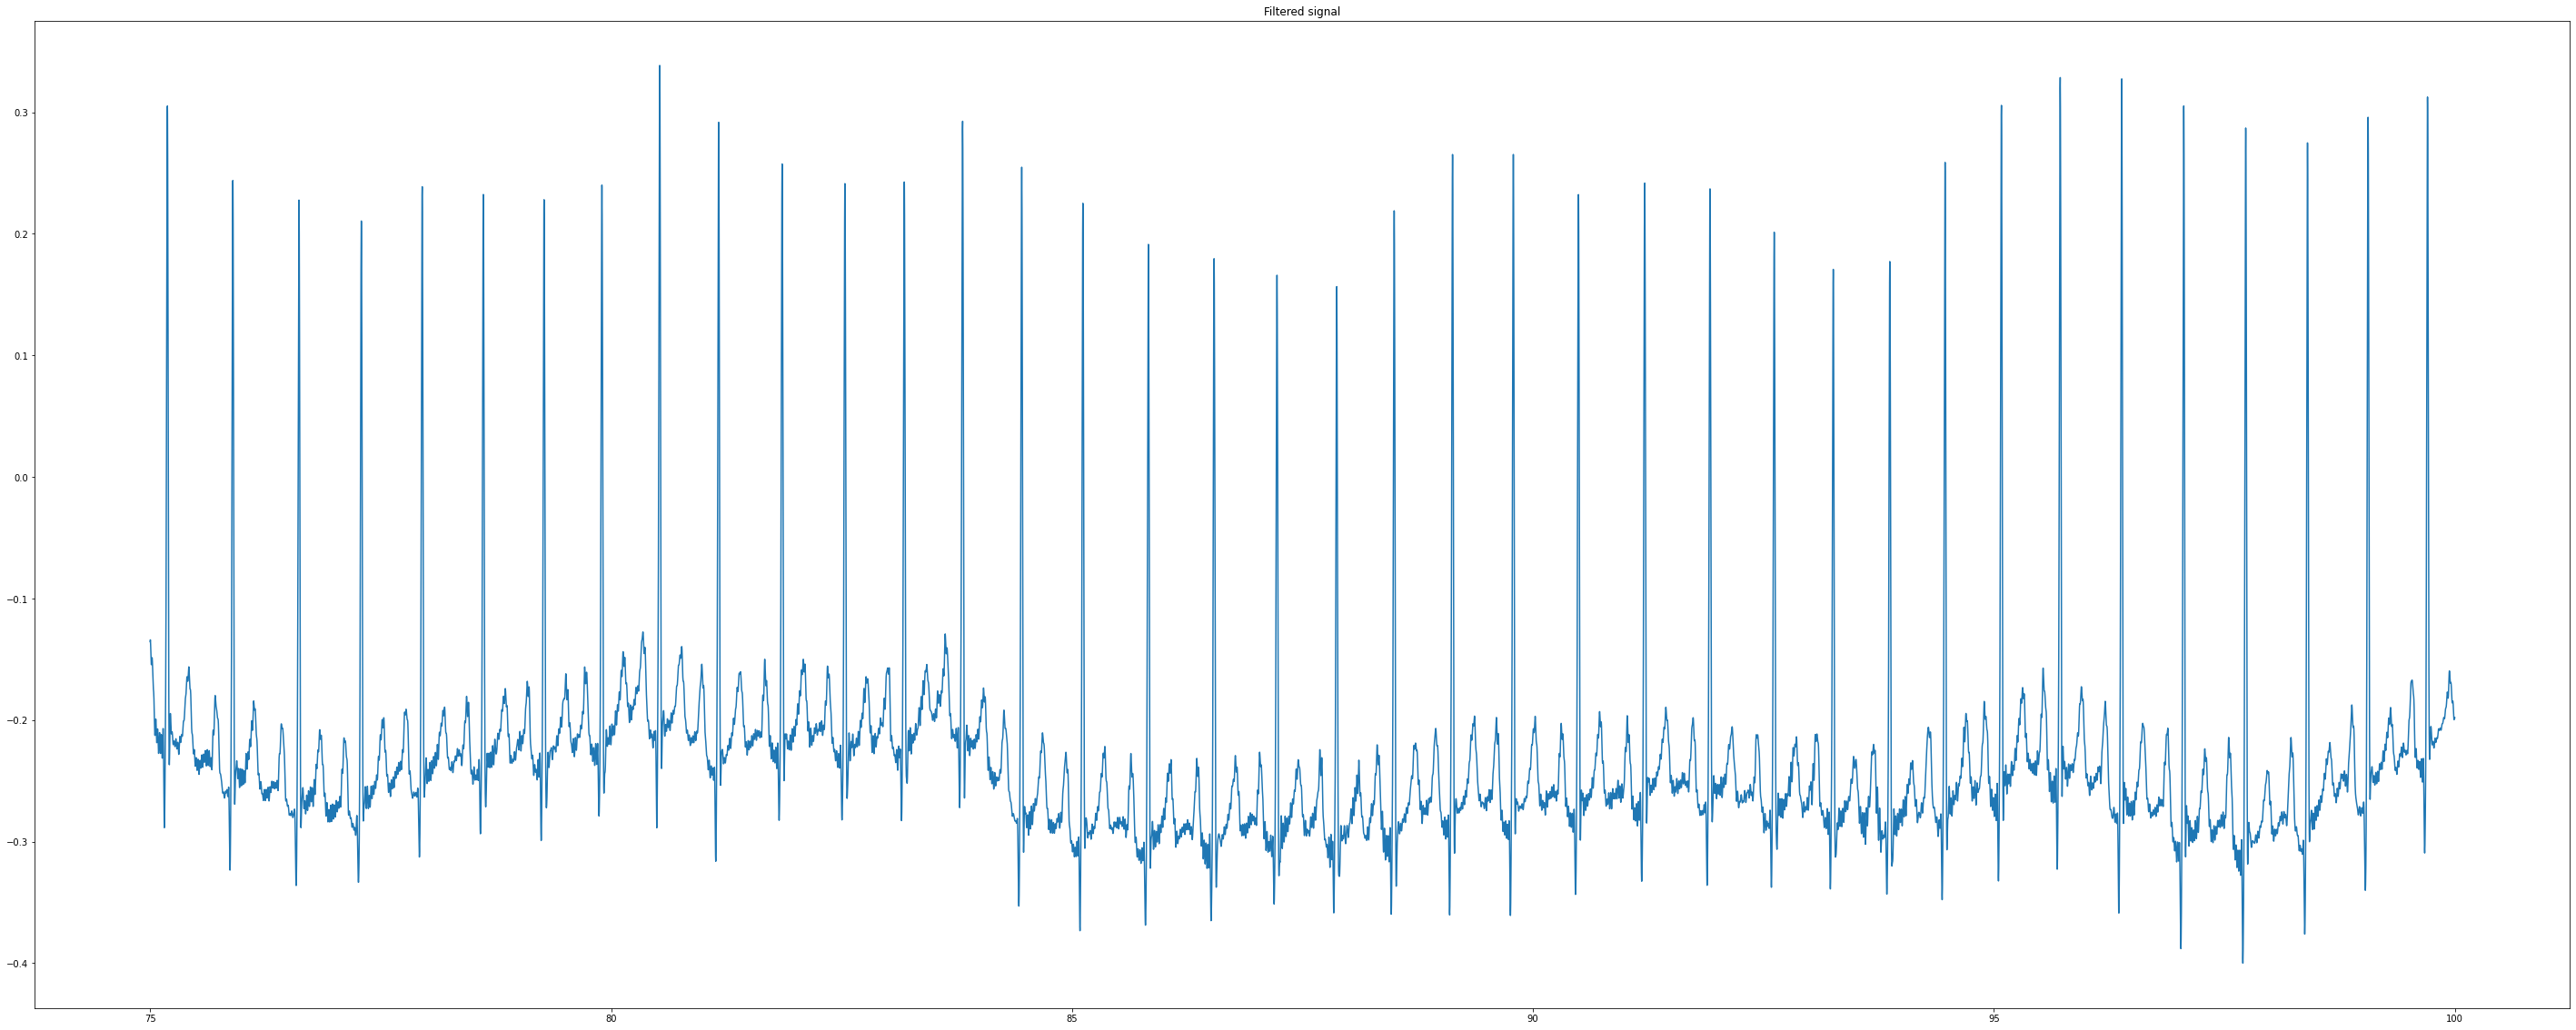

In [ ]:
plt.figure(figsize=(50,20))
plt.plot(ecg.time[75000:100000], res_sig_8[75000:100000])
plt.title("Filtered signal")

In [ ]:
# вариант решения с оконным фильтром
h_8_win = firwin(N, 40.0, pass_zero='lowpass', fs=Fs8)

In [ ]:
res_sig_8_win = np.convolve(ecg.value, h_8_win, mode="same")

Text(0.5, 1.0, 'Filtered signal (window)')

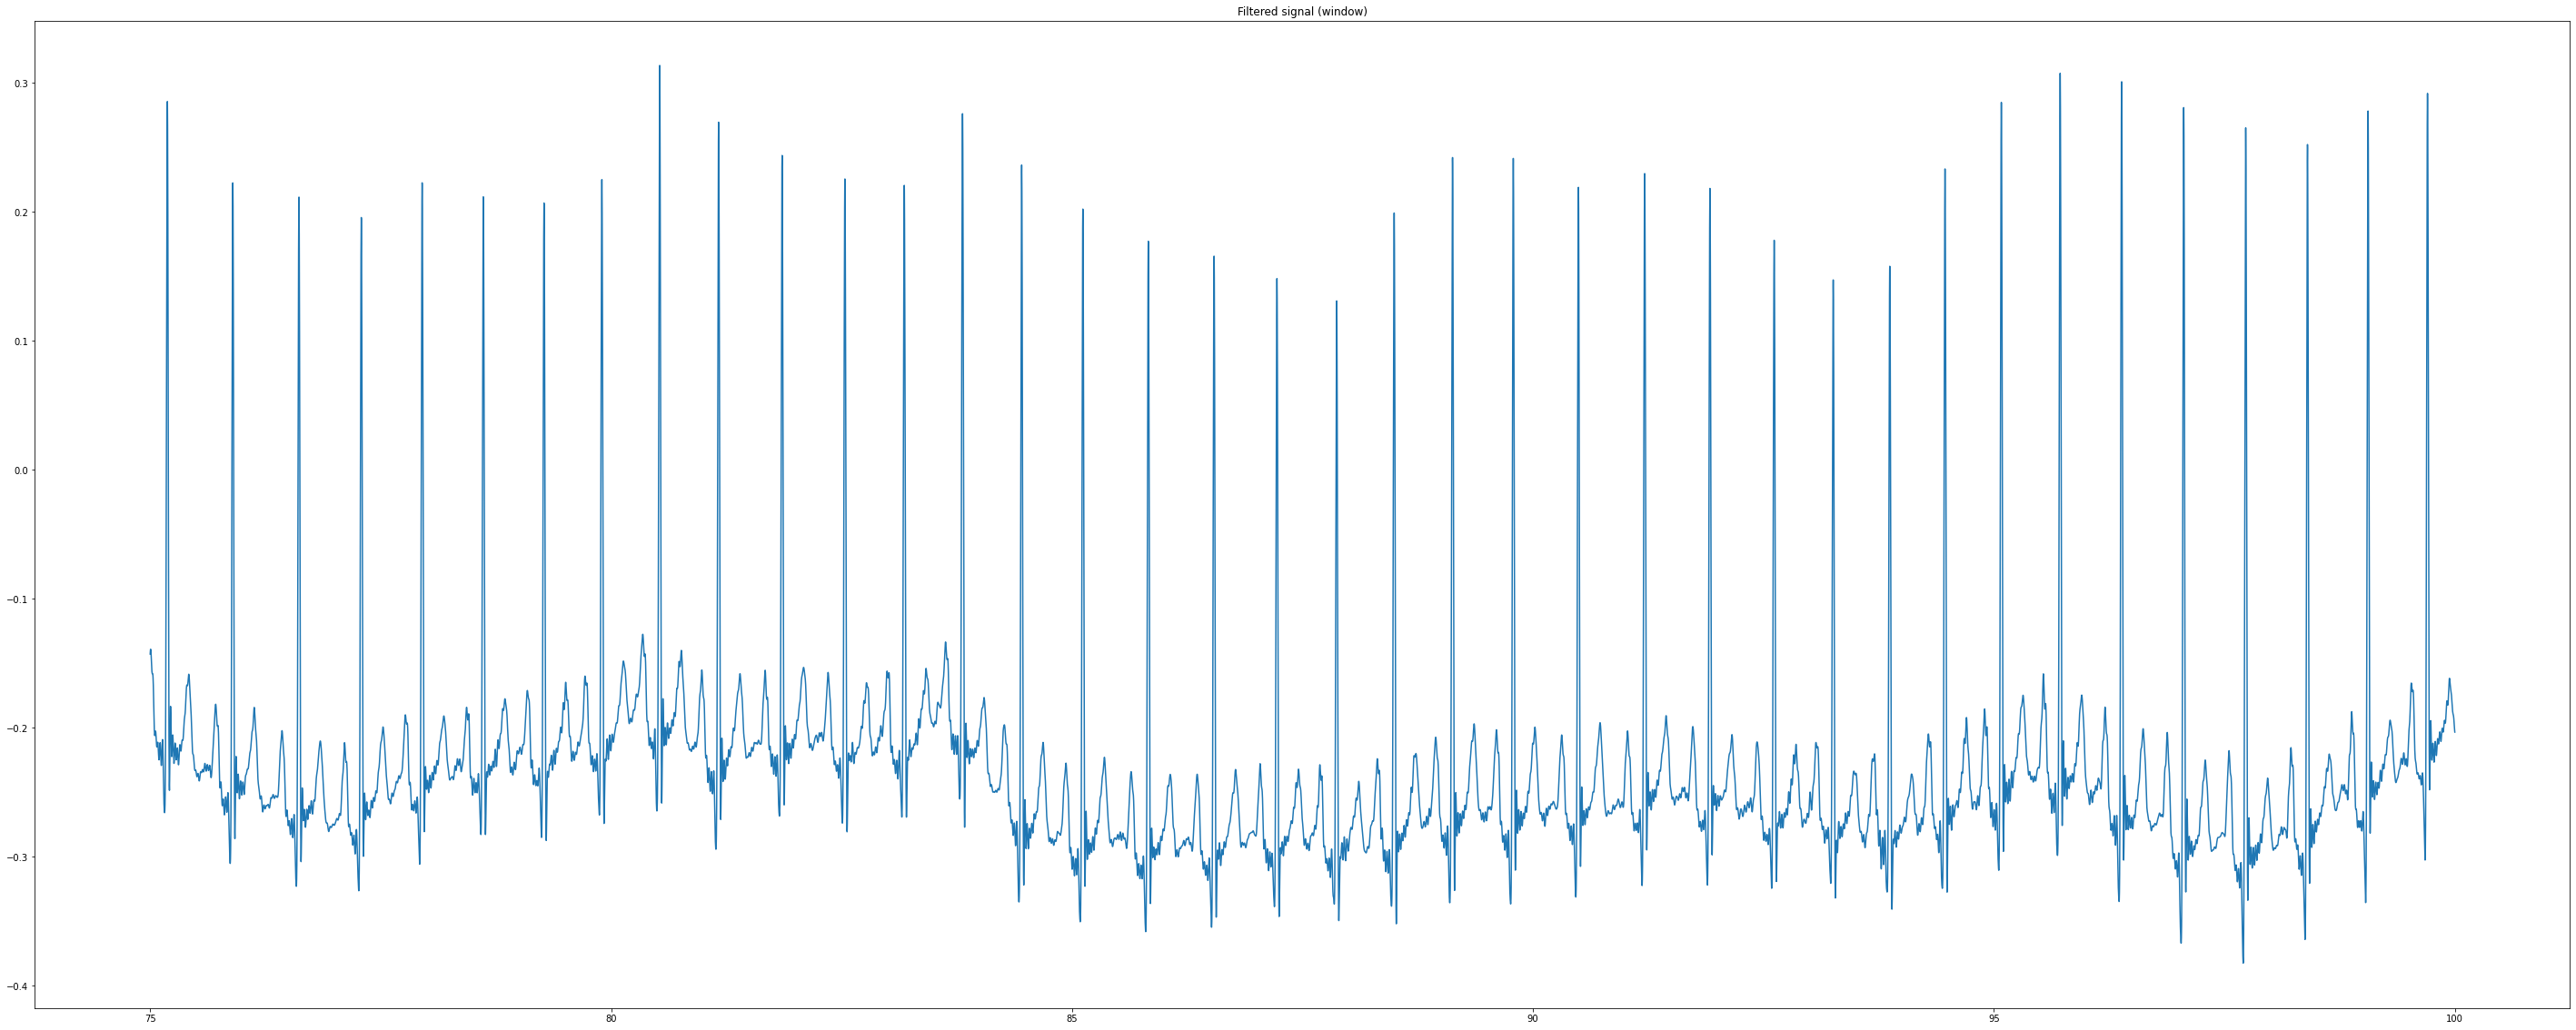

In [ ]:
plt.figure(figsize=(50,20))
plt.plot(ecg.time[75000:100000], res_sig_8_win[75000:100000])
plt.title("Filtered signal (window)")